<a href="https://colab.research.google.com/github/gkrry2723/keras_study/blob/main/keras_base_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **keras - ANN**

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

# 입력이 1 ~ -1 사이일때 가장 잘 동작하기 때문에 255로 나눠줌
# [ 500000, 32, 32, 3] -> 4차원 텐서
# x_train[54,12,13,1] : 인덱스 54의 이미지에서 (12,13)에 해당하는 픽셀의 초록색 채널의 값
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

# 이미지의 정수 레이블을 one-hot encoding vector로 바꿔줌
# one-hot vector : 정수 레이블이 7이면 7번째 원소만 1이고 나머지는 0 인 길이가 10(클래스 개수)인 벡터
# [50000,10], [10000,10]
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

170500096/170498071 [==============================] - 3s 0us/step


In [2]:
# Sequential 모델을 사용한 네트워크
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
Dense(200, activation = 'relu', input_shape=(32,32,3)),
Flatten(),
Dense(150, activation = 'relu'),
Dense(10, activation='softmax'),
])

In [3]:
# 함수형 API를 사용한 네트워크 ( 네트워크의 구조 정의 )

from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=200,activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation= 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 컴파일 (모델 손실 함수와 옵티마이저 연결)
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics= ['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, batch_size = 32, epochs=100, shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9698 - accuracy: 0.2851
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6943 - accuracy: 0.3948
Epoch 3/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5976 - accuracy: 0.4283
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5452 - accuracy: 0.4501
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5029 - accuracy: 0.4611
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4760 - accuracy: 0.4760
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4496 - accuracy: 0.4849
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4229 - accuracy: 0.4899
Epoch 9/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3997 - accuracy: 0.5024
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - l

In [5]:
# 모델 평가
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.5435 - accuracy: 0.4968


[1.543472409248352, 0.4968000054359436]

In [6]:
#predict 메서드 -> 테스트 세트에 대한 예측 결과 확인
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# [10000,10]의 크기 배열, 샘플마다 10개의 클래스 확률을 담은 벡터가 반환됨
preds = model.predict(x_test)
# 확률 배열을 하나의 예측 결과로 바꾸고 (axis=-1은 마지막 차원으로 배열을 압축하라는 것) pred_single의 크기는 [10000,1]로 바뀜
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

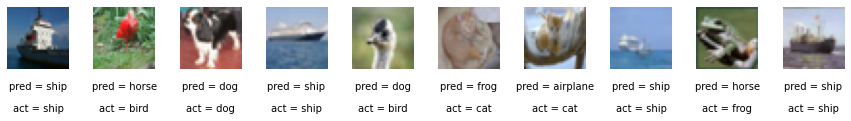

In [7]:
# 이미지와 예측값, 실제 레이블을 나란히 출력

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

# **keras-CNN**

In [8]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUM_CLASSES = 10

x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [9]:
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model

input_layer = Input(shape=(32,32,3))

conv_layer1 = Conv2D(filters = 10, kernel_size = (4,4), strides = 2, padding = 'same')(input_layer)
conv_layer2 = Conv2D(filters = 20, kernel_size = (3,3), strides = 2, padding = 'same')(conv_layer1)

flatten_layer = Flatten()(conv_layer2)

output_layer = Dense(units=10, activation='softmax')(flatten_layer)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x= Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2097280   
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512 

In [12]:
# 모델 컴파일 (모델 손실 함수와 옵티마이저 연결)
from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics= ['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, batch_size = 32, epochs=100, shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9064 - accuracy: 0.3556
Epoch 2/100
1563/1563 [==============================] - 51s 33ms/step - loss: 1.4013 - accuracy: 0.5016
Epoch 3/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2987 - accuracy: 0.5421
Epoch 4/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2234 - accuracy: 0.5652
Epoch 5/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1580 - accuracy: 0.5935
Epoch 6/100
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1149 - accuracy: 0.6062
Epoch 7/100
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0647 - accuracy: 0.6240
Epoch 8/100
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0297 - accuracy: 0.6365
Epoch 9/100
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9909 - accuracy: 0.6487
Epoch 10/100
1563/1563 [==============================]

In [13]:
# 모델 평가
model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 8ms/step - loss: 1.8462 - accuracy: 0.5764


[1.8462333679199219, 0.5763999819755554]